You can even [read more on healpy's documentation!](http://healpy.readthedocs.io/en/latest/)

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [15]:
import numpy as np
import healpy as hp

In [4]:
map_I = hp.read_map('data/LFI_SkyMap_044-BPassCorrected-field-IQU_0256_R2.01_full.fits', field=0)

NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


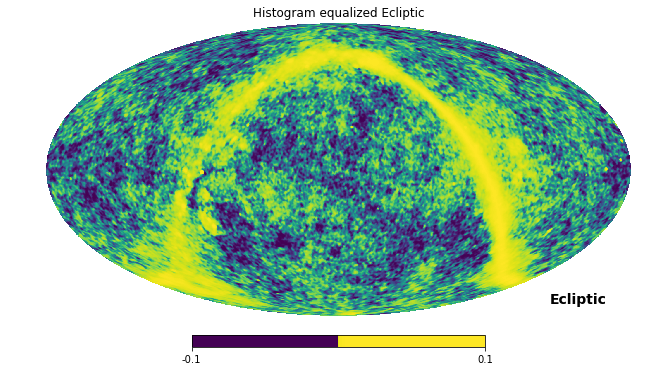

In [16]:
hp.mollview(map_I, coord=['G','E'], title='Histogram equalized Ecliptic', norm='hist', min=-0.1, max=0.1, xsize=2000)

In [6]:
LMAX = 256

alm_I = hp.sphtfunc.map2alm(map_I, lmax=256)

In [7]:
alm_I

array([  1.79745708e-05 +0.00000000e+00j,
        -1.14286983e-06 +0.00000000e+00j,
        -4.36505077e-04 +0.00000000e+00j, ...,
        -6.16220819e-07 -1.72419817e-06j,
        -2.43288465e-07 +7.53924742e-07j,   1.11179768e-06 -1.94561733e-06j])

In [8]:
map_from_alm_I = hp.sphtfunc.alm2map(alm_I, 256)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


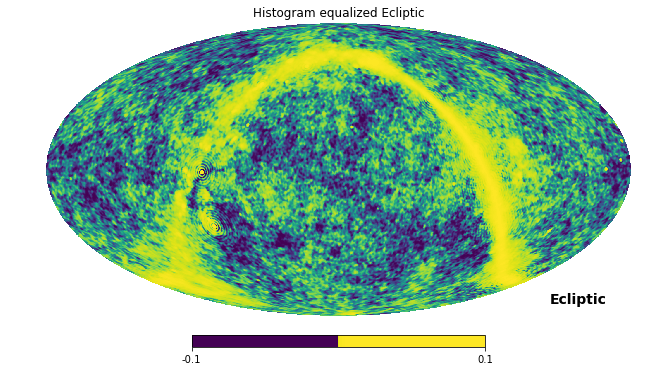

In [9]:
hp.mollview(map_from_alm_I, coord=['G','E'], title='Histogram equalized Ecliptic', norm='hist', min=-0.1, max=0.1, xsize=2000)

In [10]:
hp.fitsfunc.write_alm('alm.fits', alm_I) 

In [11]:
alms_from_file = hp.fitsfunc.read_alm('alm.fits')

In [12]:
lvals, mvals = hp.sphtfunc.Alm.getlm(LMAX, np.arange(hp.sphtfunc.Alm.getsize(LMAX)))

In [13]:
print 'Size of alm_I:', np.size(alm_I)
print 'Size of lvals:',np.size(lvals)
print 'Size of mvals:',np.size(mvals)

Size of alm_I: 33153
Size of lvals: 33153
Size of mvals: 33153


In [14]:
alm_normal = np.zeros((LMAX + 1, LMAX + 1), dtype=complex) # It's out formating

for i in xrange(0, np.size(lvals)):
        
        a = alm_I[i]
        m = mvals[i]
        l = lvals[i]
        
        alm_normal[m][l] = a